<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 2 (Problem 1) - Sentiment Analysis Model  (Group)</h2><h3>AY2022/23 Semester</h3></th>
    </tr>
</table>

In [1]:
# Import the Required Packages
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
from tensorflow import keras
import pandas as pd
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM, GRU, Embedding, Flatten, Conv1D, GlobalMaxPooling1D, MaxPooling1D, BatchNormalization, Bidirectional
from tensorflow.keras import models
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import emoji
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
%pip install tensorflow-addons
from tensorflow_addons.optimizers import AdaBelief
#Plotting graph
import string
%matplotlib inline

import csv
#from spellchecker import SpellChecker
import re
import nltk
import string
# importing jaccard distance
# and ngrams from nltk.util
from nltk.metrics.distance import jaccard_distance
from nltk.util import ngrams
nltk.download('words')
from nltk.corpus import words

gpu_available = tf.config.list_physical_devices('GPU')
print(gpu_available)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hasanah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Note: you may need to restart the kernel to use updated packages.
[]


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\hasanah\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


## Step 1 – Data Loading and Processing (Group)

### 1.1 Data Loading

In [8]:
'''Change to your file path'''
weekang_dataset = pd.read_csv("disney+_reviews.csv")
ziren_dataset = pd.read_csv("facebook_reviews.csv")
xihe_dataset = pd.read_csv("microsoftTeams_reviews.csv")
longt_dataset = pd.read_csv("wildrift_reviews.csv")
hasanah_dataset = pd.read_csv("netflix_reviews.csv")


# ======================================== CHANGE TO YOUR NAME ========================================
dataset = _dataset

In [9]:
# Remove empty reviews 

# Shows the number of empty reviews in content column in the dataframe
print(str(dataset['content'].isnull().sum()) + " empty cells in content column")

# Drop missing values from dataframe
dataset = dataset.dropna(subset=['content'],how = 'any')

print(str(dataset['content'].isnull().sum()) + " empty cells in content column after removal")

0 empty cells in content column
0 empty cells in content column after removal


In [10]:
# Remove duplicate entries in the dataframe only in the content column

# Check rows for duplicated content (searches content column only!)
print("It is " + str(dataset['content'].duplicated().any().copy()) + " that there are duplicate contents")

# Drop rows with duplicated content data 
# The first of the duplicates are kep
dataset2 = dataset.drop_duplicates(subset=['content'], keep='first').copy()

# Check if the duplicates are removed 
print("It is " + str(dataset2['content'].duplicated().any()) + " that there are duplicate contents after cleaning")

print("Number of columns left:")
dataset2.score.value_counts()


It is True that there are duplicate contents
It is False that there are duplicate contents after cleaning
Number of columns left:


3    10200
2    10199
4    10197
5    10196
1    10193
Name: score, dtype: int64

In [11]:
from IPython.display import clear_output

review_content = dataset2['content']
review_labels = dataset2['score']
csv_len = len(review_content.tolist())

# ======================================== CHANGE TO YOUR FILENAME ========================================
f = open('example.csv', 'w+', encoding="utf-8" , newline='')

words_list = []
def read_words():
    w = open('words.txt', 'r', encoding='utf-8')
    lines = w.readlines()
    for line in lines:
        line = line.replace("\n", "")
        words_list.append(line.lower())
    w.close()
    
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)


writer = csv.writer(f)
header = ['content', 'score']
writer.writerow(header)
#data = [['test', 1], ['test2', 2]]

# Filter words
# loop for finding correct spellings
# based on jaccard distance
# and printing the correct word

read_words()


filtered_reviews = []
one_count = 0
two_count = 0 
three_count = 0
four_count = 0
five_count = 0

count = 0
stop = stopwords.words('english')
print("Starting.. ETA: 2.5hrs")
for sentence, score in zip(review_content.tolist(), review_labels.tolist()):
    if score == 1 and one_count != 10000:
        one_count += 1
    elif score == 2 and two_count != 10000:
        two_count += 1
    elif score == 3 and three_count != 10000:
        three_count += 1
    elif score == 4 and four_count != 10000:
        four_count += 1
    elif score == 5 and five_count != 10000:
        five_count += 1
    else:
        continue
    sentence = remove_emojis(sentence)
    seperated_sentence = sentence.split(" ")
    filtered_sentence = []
    for word in seperated_sentence:
        # remove punctuation
        for punc in string.punctuation:
            if punc in word:
                word = word.replace(punc, '')
        word = word.lower()
        
        # adds coorect word to list
        if (word in stop):
            continue
        elif (word in words_list):
            filtered_sentence.append(word)
        #autocorrect misspelled words
        elif (len(word) > 1 and word.isalpha() and re.compile(r'[a-z]')):
            if (('a' <= word[0] <= "z" or 'A' <= word[0] <='Z') and (word.upper() != word.lower())):     
                temp = [(jaccard_distance(set(ngrams(word, 2)),
                              set(ngrams(w, 2))),w) for w in words_list if w[0]==word[0]]
                filtered_sentence.append(sorted(temp, key = lambda val:val[0])[0][1])
        
    count += 1
    filtered_reviews.append([' '.join(filtered_sentence), score])
    print("Score: " + str(score) + " \n#" + str(count))
    print(' '.join(filtered_sentence))
#     if count % 25 == 0:
#         print(f"Progress: {count}/{csv_len}")
    
writer.writerows(filtered_reviews)

f.close()
clear_output(wait=True)
print("Data cleaning completed")

Data cleaning completed


In [9]:
# dataset.columns # Find out actual namees of columns in csv

# # Drop all columns in the table that will not be used
# dataset.pop('userImage')
# dataset.pop('userName')
# dataset.pop('thumbsUpCount')
# dataset.pop('reviewCreatedVersion')
# dataset.pop('at')
# dataset.pop('replyContent')
# dataset.pop('repliedAt')

# # Check dataframe to ensure that the right tables have been dropped
# dataset.columns

### 1.2 Data Processing


In [12]:
new_dataset = pd.read_csv("_filtered.csv")

In [13]:
# Convert the content and scores into numeric tensors
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
review_content = new_dataset['content'].astype("str")
review_labels = new_dataset['score']

# Convert labels to numpy arrays
labels = to_categorical(review_labels).tolist()

for label in labels:
    label.pop(0)
labels = np.array(labels)
    
# Initialize tokenizer
vocab_size = 10000
embedding_dim = 128
max_length = 60
trunc_type = 'post'

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(review_content)
sequences = tokenizer.texts_to_sequences(review_content)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = np.array(pad_sequences(sequences, maxlen=max_length, truncating = trunc_type))

print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

Found 21518 unique tokens.
Shape of data tensor: (50000, 60)
Shape of label tensor: (50000, 5)


### 1.3 Data Sampling

In [14]:
# Split the X & y into train and test sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

x_train_split = x_train[:20000]
y_train_split = y_train[:20000]
x_val = x_train[20000:]
y_val = y_train[20000:]

print(len(x_train_split))
print(len(x_test))
print(len(x_val))

print(x_train_split[0])
print(x_test[0])
print(x_val[0])

20000
10000
20000
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0   67
  368  221  220  366   70   89  401  846  485  143    2  404  552   13
   36  112    9    3  201   10    4    1  322  781   33    1  272   88
 3969  651  170 1528]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  11  33 310  75   5  63   5
   5 696 278  11  82  46]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0  743  274  104 7677  158  468   23  268   23
  464  286  117  779   33  104  564  161   31  128 3670  104 2584    8
   22  504 1021  104]


## Step 2 – Develop a Sentiment Analysis Model (Individual: One Model Per Student)

### Model #1  (Student Name: Wee Kang)

In [54]:
# Build the Model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) #receive word embedding as input
model.add(Conv1D(128, 20, activation='relu'))
model.add(MaxPooling1D(1))
model.add(Conv1D(256, 20, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(5))
'''
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(LSTM(128, activation='relu', return_sequences=True, recurrent_dropout=0.5))
model.add(LSTM(256, activation='relu', recurrent_dropout=0.2))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax'))'''

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 40, 64)            640000    
                                                                 
 batch_normalization_21 (Bat  (None, 40, 64)           256       
 chNormalization)                                                
                                                                 
 lstm_40 (LSTM)              (None, 40, 64)            33024     
                                                                 
 lstm_41 (LSTM)              (None, 40, 128)           98816     
                                                                 
 lstm_42 (LSTM)              (None, 256)               394240    
                                                                 
 batch_normalization_22 (Bat  (None, 256)              1024      
 chNormalization)                                    

In [192]:
# Train the Model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(x_train_split, y_train_split,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Epoch 1/20
79/79 [==============================] - 36s 402ms/step - loss: 1.5143 - acc: 0.3241 - val_loss: 1.6081 - val_acc: 0.2000
Epoch 2/20
79/79 [==============================] - 31s 387ms/step - loss: 1.3708 - acc: 0.4114 - val_loss: 1.6064 - val_acc: 0.2000
Epoch 3/20
79/79 [==============================] - 30s 383ms/step - loss: 1.2609 - acc: 0.4659 - val_loss: 1.6010 - val_acc: 0.2000
Epoch 4/20
79/79 [==============================] - 30s 375ms/step - loss: 1.1868 - acc: 0.5074 - val_loss: 1.5853 - val_acc: 0.2430
Epoch 5/20
79/79 [==============================] - 30s 377ms/step - loss: 1.1223 - acc: 0.5347 - val_loss: 1.5488 - val_acc: 0.3119
Epoch 6/20
79/79 [==============================] - 30s 378ms/step - loss: 1.0716 - acc: 0.5612 - val_loss: 1.4775 - val_acc: 0.4212
Epoch 7/20
79/79 [==============================] - 30s 380ms/step - loss: 1.0206 - acc: 0.5859 - val_loss: 1.3806 - val_acc: 0.4515
Epoch 8/20
79/79 [==============================] - 32s 400ms/step - 

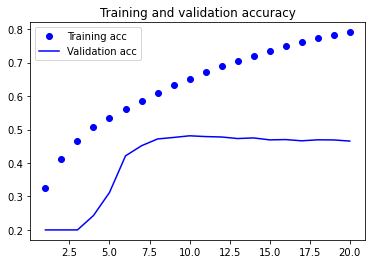

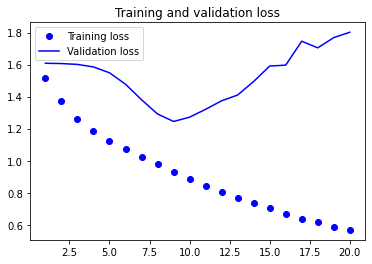

In [193]:
# Plot the Training and Validation Accuracy & Loss Scores
model.save_weights('pre_trained_glove_model_1.h5')

%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [194]:
# Save the Model
model.save('text_model_weekang.h5')

### Model #2  (Student Name: Lim Long Teck)

In [ ]:
# Build the Model


In [ ]:
# Train the Model


In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
model.save_weights('pre_trained_glove_model_2.h5')

%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save('text_model_LongTeck.h5')

### Model #3  (Student Name: Han Xihe)

In [ ]:
# Build the Model
# Test comment for github

In [ ]:
# Train the Model


In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
model.save_weights('pre_trained_glove_model_3.h5')

%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save('text_model_Xihe.h5')

### Model #4  (Student Name: Yong Zi Ren)

In [6]:
# Build the Model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim , input_length=max_length))
model.add(Bidirectional(GRU(32, return_sequences=True)))
model.add(Bidirectional(GRU(64, return_sequences=True, recurrent_dropout=0.5)))
model.add(Bidirectional(GRU(128, recurrent_dropout=0.5)))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 60, 128)           1280000   
                                                                 
 bidirectional_3 (Bidirectio  (None, 60, 64)           31104     
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 60, 128)          49920     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 256)              198144    
 nal)                                                            
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                      

In [7]:
# Train the Model
model.compile(optimizer = AdaBelief(learning_rate=1e-4),
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

history = model.fit(x_train_split, y_train_split,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    callbacks=[tf.keras.callbacks.EarlyStopping(
                        monitor='val_acc',
                        patience=5,
                        restore_best_weights=True
                    )])

Epoch 1/20
625/625 [==============================] - 429s 665ms/step - loss: 1.5662 - acc: 0.2573 - val_loss: 1.5119 - val_acc: 0.3143
Epoch 2/20
625/625 [==============================] - 419s 671ms/step - loss: 1.4362 - acc: 0.3459 - val_loss: 1.4137 - val_acc: 0.3584
Epoch 3/20
625/625 [==============================] - 412s 660ms/step - loss: 1.3553 - acc: 0.3949 - val_loss: 1.4005 - val_acc: 0.3683
Epoch 4/20
625/625 [==============================] - 410s 657ms/step - loss: 1.3075 - acc: 0.4220 - val_loss: 1.3303 - val_acc: 0.4012
Epoch 5/20
625/625 [==============================] - 403s 646ms/step - loss: 1.2685 - acc: 0.4437 - val_loss: 1.3221 - val_acc: 0.4106
Epoch 6/20
625/625 [==============================] - 418s 668ms/step - loss: 1.2387 - acc: 0.4639 - val_loss: 1.3243 - val_acc: 0.4130
Epoch 7/20
625/625 [==============================] - 444s 710ms/step - loss: 1.2158 - acc: 0.4761 - val_loss: 1.3412 - val_acc: 0.4094
Epoch 8/20
625/625 [============================

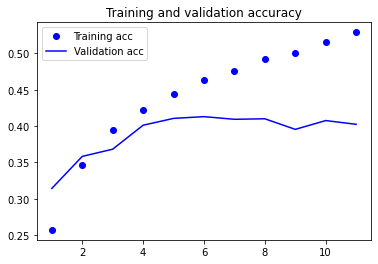

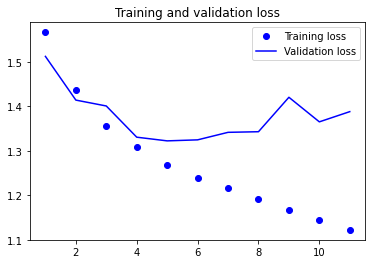

In [8]:
# Plot the Training and Validation Accuracy & Loss Scores
model.save_weights('pre_trained_glove_model_4.h5')

%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
# Save the Model
model.save('text_model_ZiRen.h5')

### Model #5  (Student Name: Hasanah)

In [65]:
# Build the Model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(GRU(32,dropout = 0.5, recurrent_dropout=0.5,return_sequences=True))
model.add(GRU(32,dropout = 0.5, recurrent_dropout=0.5))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, 60, 128)           1280000   
                                                                 
 gru_34 (GRU)                (None, 60, 32)            15552     
                                                                 
 gru_35 (GRU)                (None, 32)                6336      
                                                                 
 dense_20 (Dense)            (None, 5)                 165       
                                                                 
Total params: 1,302,053
Trainable params: 1,302,053
Non-trainable params: 0
_________________________________________________________________


In [66]:
# Train the Model
model.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(x_train_split, y_train_split,
                    epochs=20,
                    batch_size=20,
                    validation_data=(x_val, y_val))

Epoch 1/20
1000/1000 [==============================] - 53s 49ms/step - loss: 1.5908 - acc: 0.2637 - val_loss: 1.5291 - val_acc: 0.3200
Epoch 2/20
1000/1000 [==============================] - 54s 54ms/step - loss: 1.4440 - acc: 0.3529 - val_loss: 1.3818 - val_acc: 0.3763
Epoch 3/20
1000/1000 [==============================] - 55s 55ms/step - loss: 1.3652 - acc: 0.3860 - val_loss: 1.3367 - val_acc: 0.4036
Epoch 4/20
1000/1000 [==============================] - 54s 54ms/step - loss: 1.3292 - acc: 0.4099 - val_loss: 1.3140 - val_acc: 0.4182
Epoch 5/20
1000/1000 [==============================] - 60s 60ms/step - loss: 1.3046 - acc: 0.4277 - val_loss: 1.2997 - val_acc: 0.4293
Epoch 6/20
1000/1000 [==============================] - 59s 59ms/step - loss: 1.2838 - acc: 0.4401 - val_loss: 1.2879 - val_acc: 0.4349
Epoch 7/20
1000/1000 [==============================] - 59s 59ms/step - loss: 1.2674 - acc: 0.4500 - val_loss: 1.2748 - val_acc: 0.4439
Epoch 8/20
1000/1000 [==========================

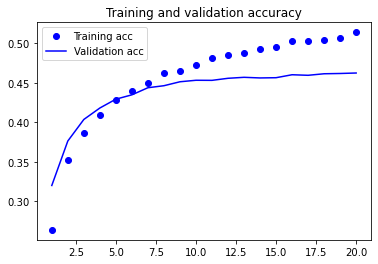

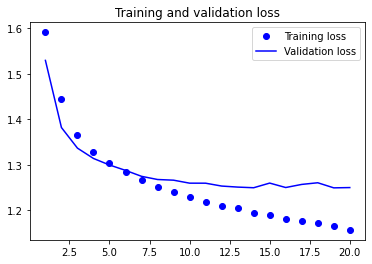

In [67]:
# Plot the Training and Validation Accuracy & Loss Scores
model.save_weights('pre_trained_glove_model_5.h5')

%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [68]:
# Save the Model
model.save('text_model_hasanah.h5')

## Step 3 – Evaluate the Model using Testing Data (Individual & Group)

In [196]:
# Model #1 (replicate where necessary for other models)
model1 = keras.models.load_model('text_model_weekang.h5')

test_loss, test_acc = model1.evaluate(x_test, y_test, steps=50)
print('test acc:', test_acc)

50/50 [==============================] - 3s 58ms/step - loss: 1.8087 - acc: 0.4681
test acc: 0.46810001134872437


In [ ]:
# Model #2 (replicate where necessary for other models)
model2 = keras.models.load_model('text_model_LongTeck.h5')

test_loss, test_acc = model1.evaluate(x_val, y_val, steps=50)
print('test acc:', test_acc)

In [ ]:
# Model #3 (replicate where necessary for other models)
model3 = keras.models.load_model('text_model_Xihe.h5')

test_loss, test_acc = model1.evaluate(x_val, y_val, steps=50)
print('test acc:', test_acc)

In [ ]:
# Model #4 (replicate where necessary for other models)
model4 = keras.models.load_model('text_model_ZiRen.h5')

test_loss, test_acc = model1.evaluate(x_val, y_val, steps=50)
print('test acc:', test_acc)

In [70]:
# Model #5 (replicate where necessary for other models)
model5 = keras.models.load_model('text_model_hasanah.h5')

test_loss, test_acc = model5.evaluate(x_test, y_test, steps=50)
print('test acc:', test_acc)

50/50 [==============================] - 6s 93ms/step - loss: 1.2580 - acc: 0.4562
test acc: 0.4562000036239624


In [197]:
# Save the Best Model
model1.save('text_model_best.h5')

## Step 4 – Use the Best Model to make prediction (Group)

In [198]:
best_model = keras.models.load_model('text_model_best.h5')

In [235]:
# takes the user input
text_input = np.array([input("")])

it is very laggy it plays the wrong movies


In [236]:
# convert the user input into numeric tensor

# Initialize tokenizer
vocab_size = 10000
embedding_dim = 32
max_length = 40
trunc_type = 'post'

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(text_input)
sequences = tokenizer.texts_to_sequences(text_input)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=max_length)

print(text_input)
print('Shape of data tensor:', data.shape)

Found 8 unique tokens.
['it is very laggy it plays the wrong movies']
Shape of data tensor: (1, 40)


In [237]:
# show the model output using predict function
predictions = model.predict(data)
print("This review's rating is: " + str(predictions.argmax()))

This review's rating is: 4
